# Imports

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframes

In [91]:
PATH_EVENTS = "data/events.csv"
PATH_POINTS = "data/points.csv"
PATH_RALLIES = "data/rallies.csv"
PATH_SERVES = "data/serves.csv"

df_events = pd.read_csv(PATH_EVENTS)
df_points = pd.read_csv(PATH_POINTS)
df_rallies = pd.read_csv(PATH_RALLIES)
df_serves = pd.read_csv(PATH_SERVES)

df_events.head(3)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92


### Create new column for elapsed time during the single rally (time it took for ball to go to receiver from hitter)

In [92]:
df_events["elapsed_time"] = df_events["time"].diff()
df_events["elapsed_time"].fillna(0, inplace=True)

### Calculate single velocity instance by dividing change in position (Euclidian distance) by change in time.

In [93]:
df_events["velocity (yard/second) "] = np.sqrt(np.square(df_events["hitter_x"] - df_events["receiver_x"]) + np.square(df_events["hitter_y"] - df_events["receiver_y"])) / df_events["elapsed_time"]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
df_events.head(3)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,elapsed_time,velocity (yard/second)
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00,0.00,0.000000
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92,0.92,27.427616
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92,2.00,12.174392


### Dropping some columns

In [114]:
df_events_velocity = df_events.drop(["hitter_x","hitter_y","receiver_x","hitter_y"], axis=1)
df_events_velocity.head(3)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,receiver_y,time,elapsed_time,velocity (yard/second)
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,27.44,0.00,0.00,0.000000
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,1.11,0.92,0.92,27.427616
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,26.45,2.92,2.00,12.174392
3,3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,26.83,24.44,21.52,1.257296
4,4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,26.47,36.76,12.32,2.195982


In [109]:
df_points.head(3)

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
1,2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0"
2,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0"


In [96]:
df_rallies.head(5)

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96
1,1,2,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,7.42,12.10
2,2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39
3,3,4,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,4.64,17.69
4,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18


In [97]:
df_serves.head(2)

,Unnamed: 0,rallyid,server,x,y
0,0,1,Djokovic,1.86,16.80
1,1,3,Djokovic,7.05,16.97


# Data sanitisation

No need :)

# Analysis

The eventual winner was Djokovic, lets have a look at the discrepencies in stats

### Questions (Part 1) - Serves
- how many ace's did Nadal get?
- how many points did Nadal win off of his serves?
- how does this compare for Djokovic? 
- **was serving even a significant factor in determining the outcome of this game?**
    
### Questions (Part 2) - Serves
- If serving was significant, in what way? Just the power of the serve? The way the returner tried to receive? 
    - **=> Part 3A**
- If serving was NOT significant, were they then largely determined by rallies?
    - How many strokes are required for it to be a win by rally? I will consider it to be 3. **WHY?** 
        - **=> Part 3B**

### Questions (Part 3A) - Serves & Returns
- What were the positions of returns from serves where the server won the point?
- What were the positions of returns from serves where the receiver won the point?
- **Do these have any correlation to resulting win/loss of the match?**

### Questions (Part 3B) - Rallies
- What were the common types of returns for Nadal and Djokovic?
- **What were the "winning" positions (x,y) for the points won?**
- **What were the "winning" hands? i.e. were they mainly forehands or backhands?** 


### Custom data frames - first serves from Djokovic and Nadal

In [98]:
ARG_FIRST_SERVE = (df_points["serve"] == "first")
df_first_serve = df_points[ARG_FIRST_SERVE]

ARG_SERVER_NADAL = df_first_serve["server"] == "Nadal"
ARG_SERVER_DJOK = df_first_serve["server"] == "Djokovic"

df_first_serve_nadal = df_first_serve[ARG_SERVER_NADAL]
df_first_serve_djok = df_first_serve[ARG_SERVER_DJOK]

df_first_serve_nadal.head(5)

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
5,8,9,Nadal,Djokovic,Djokovic,winner,first,12,0.92,3.65,9.50,"1:0, 30:0"
6,10,11,Nadal,Djokovic,Nadal,winner,first,4,1.08,7.34,18.76,"1:0, 30:15"
8,13,14,Nadal,Djokovic,Djokovic,out,first,3,2.64,1.07,25.85,"2:0, 0:0"
13,19,20,Nadal,Djokovic,Djokovic,winner,first,12,12.92,0.53,21.45,"3:0, 15:0"
15,23,24,Nadal,Djokovic,Djokovic,winner,first,4,0.72,7.30,22.58,"3:0, 30:15"


In [99]:
df_first_serve_djok.head(5)

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
3,5,6,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0"
9,14,15,Djokovic,Nadal,Djokovic,out,first,2,0.80,4.39,27.45,"2:0, 15:0"
10,16,17,Djokovic,Nadal,Djokovic,out,first,4,4.00,5.45,30.23,"2:0, 30:0"
11,17,18,Djokovic,Nadal,Djokovic,out,first,6,6.40,8.55,22.48,"2:0, 40:0"


In [100]:
ARG_ACE_NADAL = df_first_serve_nadal["reason"] == "ace"
df_nadal_ace = df_first_serve_nadal[ARG_ACE_NADAL]
df_nadal_ace

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
67,97,98,Nadal,Djokovic,Nadal,ace,first,1,0.0,-1.11,26.94,"6:3 2:2, 30:15"
111,162,163,Nadal,Djokovic,Nadal,ace,first,1,0.0,11.29,25.49,"6:3 6:2 3:1, 0:30"
124,179,180,Nadal,Djokovic,Nadal,ace,first,1,0.0,4.62,6.79,"6:3 6:2 4:2, 15:15"


In [101]:
ARG_ACE_DJOK = df_first_serve_djok["reason"] == "ace"
df_djok_ace = df_first_serve_djok[ARG_ACE_DJOK]
df_djok_ace.head(3)

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
12,18,19,Djokovic,Nadal,Djokovic,ace,first,1,0.0,1.62,10.23,"3:0, 0:0"
21,30,31,Djokovic,Nadal,Djokovic,ace,first,1,0.0,4.63,16.10,"3:1, 15:0"
23,32,33,Djokovic,Nadal,Djokovic,ace,first,1,0.0,4.23,18.13,"3:1, 40:0"


In [102]:
df_lengths = [len(df_nadal_ace), len(df_djok_ace)]
X = np.arange(2)

Text(0.5, 1.0, 'Comparing Frequency of Aces Between Nadal and Djokovic')

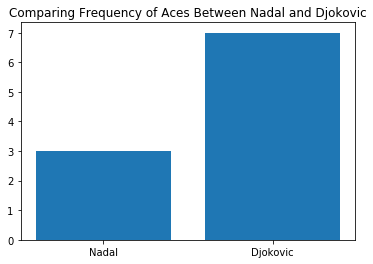

In [103]:
plt.bar(X, df_lengths)
plt.xticks(X, ["Nadal", "Djokovic"])
plt.title("Comparing Frequency of Aces Between Nadal and Djokovic")

### Visualisation

## Does the difference in speed between when nadal receives the ball and hits it back have a correlation to his win (or loss)



## Calculating average speed of strokes for every set

In [104]:
ARG_NO_SERVES = df_events["type"] != "serve"
df_strokes_only = df_events[ARG_NO_SERVES]
df_strokes_only.groupby("rallyid")

## Calculating the average velocity of the ball per Set by player

Rallies only, serves will skew the data

In [105]:
# Get rally events only
ARG_RALLY = df_events["isserve"] == False
df_rally_only = df_events[ARG_RALLY]
df_rally_only.head(5)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,elapsed_time,velocity (yard/second)
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92,0.92,27.427616
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92,2.00,12.174392
5,5,3,71820,2,Nadal,Djokovic,False,second,slice,forehand,7.40,24.79,4.47,0.19,37.72,0.96,25.806120
6,6,3,71860,3,Djokovic,Nadal,False,second,topspin,backhand,1.66,0.43,6.12,25.84,39.32,1.60,16.124027
7,7,3,71900,4,Nadal,Djokovic,False,second,topspin,forehand,8.14,27.07,3.12,-0.94,40.92,1.60,17.785182


In [106]:
# Get rally events for Djokovic
ARG_RALLY_DJOK = df_rally_only["hitter"] == "Djokovic"
df_rally_only_djok = df_rally_only[ARG_RALLY_DJOK]
df_rally_only_djok.head(5)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,elapsed_time,velocity (yard/second)
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92,2.0,12.174392
6,6,3,71860,3,Djokovic,Nadal,False,second,topspin,backhand,1.66,0.43,6.12,25.84,39.32,1.6,16.124027
13,13,6,73330,3,Djokovic,Nadal,False,first,topspin,backhand,1.57,1.37,8.12,26.94,98.12,1.2,21.996329
15,15,6,73390,5,Djokovic,Nadal,False,first,topspin,forehand,3.11,-0.08,7.66,26.09,100.52,1.2,22.135495
17,17,6,73440,7,Djokovic,Nadal,False,first,topspin,backhand,3.25,-0.08,6.42,25.37,102.52,0.8,32.058331


In [107]:
# Get rally events for Djokovic
ARG_RALLY_NADAL = df_rally_only["hitter"] == "Nadal"
df_rally_only_nadal = df_rally_only[ARG_RALLY_NADAL]
df_rally_only_nadal.head()

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,elapsed_time,velocity (yard/second)
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92,0.92,27.427616
5,5,3,71820,2,Nadal,Djokovic,False,second,slice,forehand,7.40,24.79,4.47,0.19,37.72,0.96,25.806120
7,7,3,71900,4,Nadal,Djokovic,False,second,topspin,forehand,8.14,27.07,3.12,-0.94,40.92,1.60,17.785182
12,12,6,73300,2,Nadal,Djokovic,False,first,topspin,forehand,8.84,27.57,4.47,1.26,96.92,0.80,33.338065
14,14,6,73360,4,Nadal,Djokovic,False,first,topspin,forehand,8.96,26.45,1.66,1.41,99.32,1.20,21.735333


In [108]:
def calculate_velocity(df):
    """ √(x1-x2)+(y1-y1)"""
    velocity = df

